## OCR (PaddleOCR)

- quick start: https://paddlepaddle.github.io/PaddleOCR/latest/en/ppocr/quick_start.html
- draw_ocr: https://github.com/PaddlePaddle/PaddleOCR/blob/main/tools/infer/utility.py#L451

In [1]:
from PIL import Image

from paddleocr import PaddleOCR, draw_ocr

In [2]:
!ls ../menu_images

menu1.jpg menu2.jpg menu3.jpg menu4.jpg


In [14]:
ocr = PaddleOCR(use_angle_cls=False, lang='japan')

[2025/01/22 14:20:06] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/Users/YShimada-MBP16/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/Users/YShimada-MBP16/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_

In [26]:
%%time

img_path = '../menu_images/menu1.jpg'

result = ocr.ocr(img_path, cls=False)

[2025/01/22 14:39:22] ppocr DEBUG: dt_boxes num : 73, elapsed : 0.4021451473236084
[2025/01/22 14:39:31] ppocr DEBUG: rec_res num  : 73, elapsed : 8.918764114379883
CPU times: user 9.07 s, sys: 257 ms, total: 9.32 s
Wall time: 9.34 s


In [27]:
result

[[[[[89.0, 34.0], [151.0, 34.0], [151.0, 70.0], [89.0, 70.0]],
   ('太古', 0.9997256994247437)],
  [[[155.0, 36.0], [233.0, 36.0], [233.0, 51.0], [155.0, 51.0]],
   ('Restaurant.', 0.9756962060928345)],
  [[[59.0, 55.0], [163.0, 76.0], [154.0, 126.0], [49.0, 105.0]],
   ('INOS!', 0.8337891697883606)],
  [[[151.0, 53.0], [184.0, 53.0], [184.0, 68.0], [151.0, 68.0]],
   ('酒場', 0.9997854232788086)],
  [[[261.0, 47.0], [420.0, 47.0], [420.0, 82.0], [261.0, 82.0]],
   ('ダイヤソー', 0.9213285446166992)],
  [[[140.0, 69.0], [228.0, 82.0], [223.0, 123.0], [135.0, 111.0]],
   ('SJURC', 0.8116300702095032)],
  [[[284.0, 100.0], [561.0, 102.0], [561.0, 137.0], [284.0, 135.0]],
   ('オジ十ルメニュー', 0.9819043874740601)],
  [[[484.0, 144.0], [569.0, 144.0], [569.0, 157.0], [484.0, 157.0]],
   ('価格は全て税込です', 0.9427332282066345)],
  [[[56.0, 171.0], [215.0, 171.0], [215.0, 188.0], [56.0, 188.0]],
   ('ダイ十ソー1ボソドステ一キ', 0.7667741179466248)],
  [[[289.0, 172.0], [344.0, 172.0], [344.0, 189.0], [289.0, 189.0]],
   ('3

In [28]:
len(result[0])

69

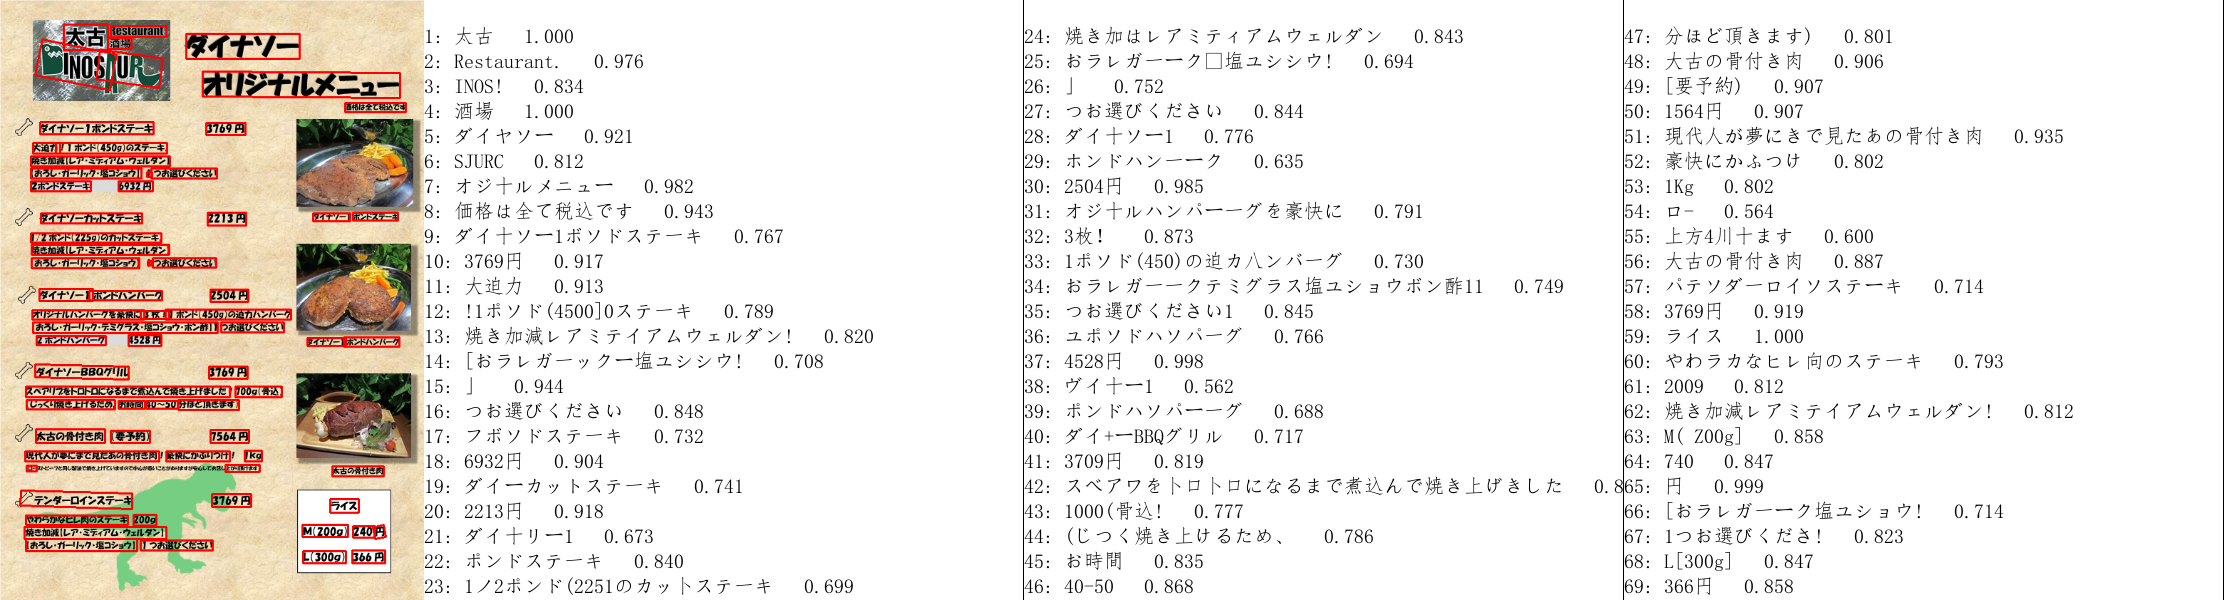

In [29]:
result_draw = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result_draw]
txts = [line[1][0] for line in result_draw]
scores = [line[1][1] for line in result_draw]
im_show = draw_ocr(image, boxes, txts, scores, font_path='./fonts/simfang.ttf')
im_show = Image.fromarray(im_show)
im_show
#im_show.save('result.jpg')

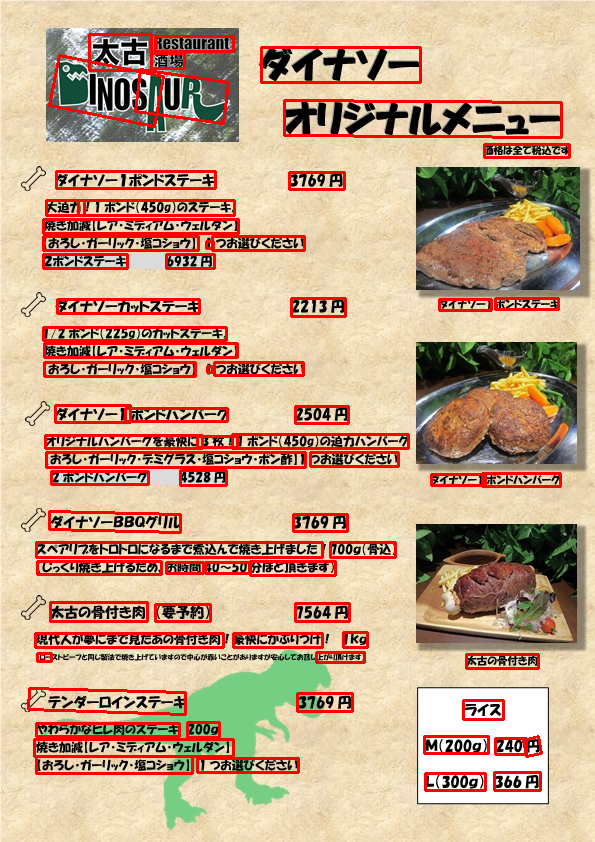

In [30]:
result_draw = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result_draw]
txts = [line[1][0] for line in result_draw]
scores = [line[1][1] for line in result_draw]
#im_show = draw_ocr(image, boxes, txts, scores, font_path='./fonts/simfang.ttf')
im_show = draw_ocr(image, boxes, drop_score=0.1, font_path='./fonts/simfang.ttf')
im_show = Image.fromarray(im_show)
im_show
#im_show.save('result2.jpg')

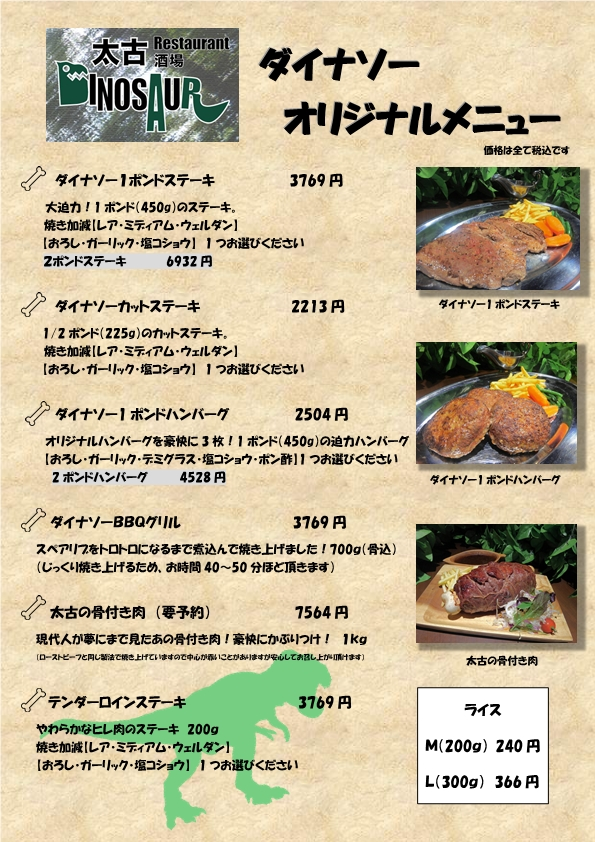

In [23]:
image

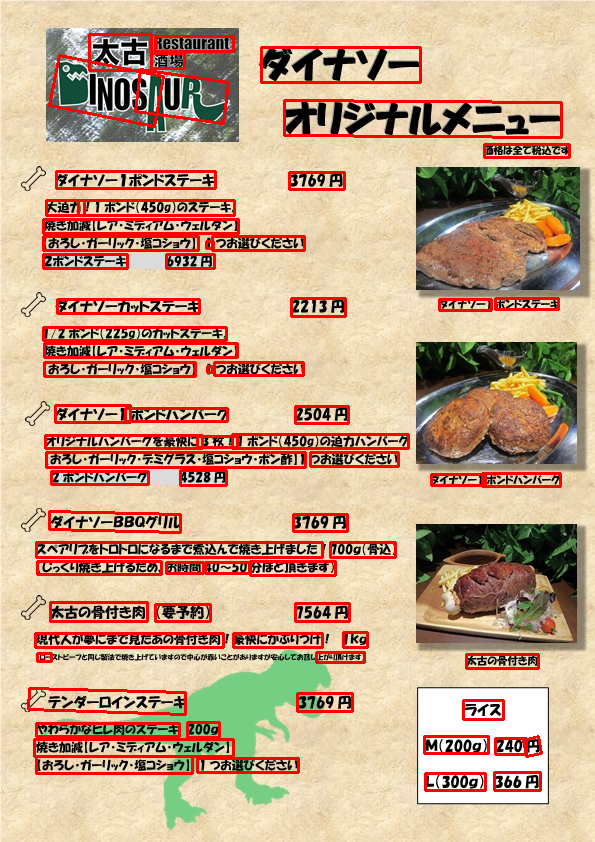

In [24]:
display(im_show)

In [25]:
draw_ocr

<function tools.infer.utility.draw_ocr(image, boxes, txts=None, scores=None, drop_score=0.5, font_path='./doc/fonts/simfang.ttf')>